 # <center> <b>  Analysis and prediction of health insurance enrolment based on XGBoost algorithm</b> </center> 

## Description of the problem

Sound health care plays an important role in the survival and viability of a nation's social and economic development, especially in low- and middle-income countries with the highest prevalence of diseases. The National Health Insurance Scheme (NHIS) became operational in 2015 with the aim of providing adequate and affordable health care to all Nigerians, but a significant proportion of Nigerians still do not have health insurance.

The project in this paper involves the use of the 2018 Nigeria Demographic and Health Survey [DHS](https://dhsprogram.com/data/dataset/Nigeria_Standard-DHS_2018.cfm) dataset and the use of machine learning classification models to predict whether an individual will purchase health insurance.


depository

In [27]:
import pandas as pd
import numpy as np 
# import pyreadstat
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei','Songti SC','STFangsong']
plt.rcParams['axes.unicode_minus']=False
import seaborn as sns
from collections import Counter
import sklearn
import pickle
import warnings
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore')

载入数据

In [28]:
data = pd.read_csv('./dhs_data.csv')

数据预处理

In [29]:
data[data.duplicated()]

,Type of place of residence,Years lived in place of residence,Highest year of education,Time to get to water source,Type of toilet facility,Main floor material,Main wall material,Number of children 5 and under in household (de jure),De jure type of place of residence,Literacy,...,Respondent ate: any other oils and fats,Respondent ate: sugar-sweetened beverages,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Heard/seen family planning message: as for me and my partner,Heard/seen family planning message: unspaced children,Malaria can be fully cured by medicine,Constant leakage of urine or stool,target
9905,Rural,Always,6.0,10.0,Pit latrine with slab,Earth/sand,Bamboo with mud,0.0,Rural,Cannot read at all,...,No,No,No,No,No,No,No,Agree,No,No
10821,Rural,Always,6.0,25.0,No facility/bush/field,Ceramic tiles,Stone with mud,2.0,Rural,Cannot read at all,...,No,No,No,No,No,No,No,Agree,No,No
15783,Rural,Always,1.0,On premises,Pit latrine with slab,Cement,Cement,6.0,Rural,Cannot read at all,...,Yes,No,No,No,No,No,No,Agree,No,No
15984,Rural,Always,6.0,10.0,No facility/bush/field,Earth/sand,Stone with mud,2.0,Rural,Cannot read at all,...,Yes,No,No,No,No,No,No,Agree,No,No
16748,Rural,Always,6.0,10.0,Pit latrine with slab,Cement,Stone with mud,3.0,Rural,Cannot read at all,...,Yes,No,No,No,No,No,No,Agree,No,No
20430,Urban,Always,6.0,On premises,Pit latrine with slab,Cement,Cement,4.0,Urban,Cannot read at all,...,Yes,No,No,No,No,No,No,Agree,No,No
20719,Urban,Always,5.0,On premises,Pit latrine with slab,Cement,Cement blocks,1.0,Urban,Able to read whole sentence,...,No,No,No,No,No,No,No,Agree,No,No
21443,Rural,Always,4.0,10.0,Pit latrine with slab,Cement,Cement,0.0,Rural,Able to read only parts of sentence,...,Yes,No,No,No,No,No,No,Agree,No,No
21601,Rural,Always,6.0,On premises,Pit latrine with slab,Cement,Cement,2.0,Rural,Able to read whole sentence,...,Yes,No,No,No,No,Yes,Yes,Agree,No,Yes
22991,Rural,Always,6.0,6.0,Pit latrine without slab/open pit,Cement,Dirt,0.0,Rural,Cannot read at all,...,No,No,No,No,No,No,No,Agree,No,No


In [30]:
data.drop_duplicates(keep='first',inplace=True) 

In [31]:
data[data.isnull().T.any()]

,Type of place of residence,Years lived in place of residence,Highest year of education,Time to get to water source,Type of toilet facility,Main floor material,Main wall material,Number of children 5 and under in household (de jure),De jure type of place of residence,Literacy,...,Respondent ate: any other oils and fats,Respondent ate: sugar-sweetened beverages,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Heard/seen family planning message: as for me and my partner,Heard/seen family planning message: unspaced children,Malaria can be fully cured by medicine,Constant leakage of urine or stool,target


In [32]:
df = data.copy()
df.drop('target', axis=1, inplace=True)
print(f"data_shape:{data.shape}")
print(f"df_shape:{df.shape}")

data_shape:(41808, 56)
df_shape:(41808, 55)


In [33]:
df.head()

,Type of place of residence,Years lived in place of residence,Highest year of education,Time to get to water source,Type of toilet facility,Main floor material,Main wall material,Number of children 5 and under in household (de jure),De jure type of place of residence,Literacy,...,Respondent ate: any milk or milk products,Respondent ate: any other oils and fats,Respondent ate: sugar-sweetened beverages,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Heard/seen family planning message: as for me and my partner,Heard/seen family planning message: unspaced children,Malaria can be fully cured by medicine,Constant leakage of urine or stool
0,Urban,8.0,3.0,10.0,Flush to piped sewer system,Ceramic tiles,Cement,1.0,Urban,Able to read whole sentence,...,Yes,Yes,Yes,No,No,No,Yes,No,Agree,No
1,Urban,Always,4.0,On premises,Flush to septic tank,Ceramic tiles,Cement blocks,0.0,Urban,Able to read whole sentence,...,No,Yes,No,Yes,No,No,No,No,Agree,No
2,Urban,5.0,3.0,20.0,Flush to piped sewer system,Carpet,Cement,2.0,Urban,Able to read whole sentence,...,No,Yes,No,No,Yes,No,No,No,Agree,No
3,Urban,2.0,2.0,On premises,Flush to piped sewer system,Ceramic tiles,Cement,1.0,Urban,Able to read whole sentence,...,No,Yes,No,No,No,No,No,No,Disagree,No
4,Urban,Always,6.0,20.0,Flush to piped sewer system,Carpet,Cement,0.0,Urban,Able to read whole sentence,...,No,Yes,Yes,No,No,No,No,No,Agree,No


In [34]:
cateFeats = df.select_dtypes(exclude = np.number).columns   #查看分类特征列
cateFeats

Index(['Type of place of residence', 'Years lived in place of residence',
       'Highest year of education', 'Time to get to water source',
       'Type of toilet facility', 'Main floor material', 'Main wall material',
       'De jure type of place of residence', 'Literacy',
       'Frequency of reading newspaper or magazine',
       'Frequency of listening to radio', 'Frequency of watching television',
       'Owns a mobile telephone',
       'Has an account in a bank or other financial institution',
       'Use of internet', 'Frequency of using internet last month',
       'Source known for any method',
       'Heard family planning on radio last few months',
       'Heard family planning on TV last few months',
       'Heard family planning in newspaper/magazine last few months',
       'Heard family planning by text messages on mobile phone',
       'Visited health facility last 12 months',
       'Getting medical help for self: getting permission to go',
       'Getting medical h

In [35]:
for column in cateFeats:
    le = LabelEncoder()
    le.fit(df[column])
    le_ = le.transform(df[column])
    df[column] = le_

In [36]:
data['target'] = data.target.map({"Yes":1,"No":0})
data['target'].unique()

array([0, 1], dtype=int64)

In [37]:
data['target'].value_counts().values.tolist()

[40692, 1116]

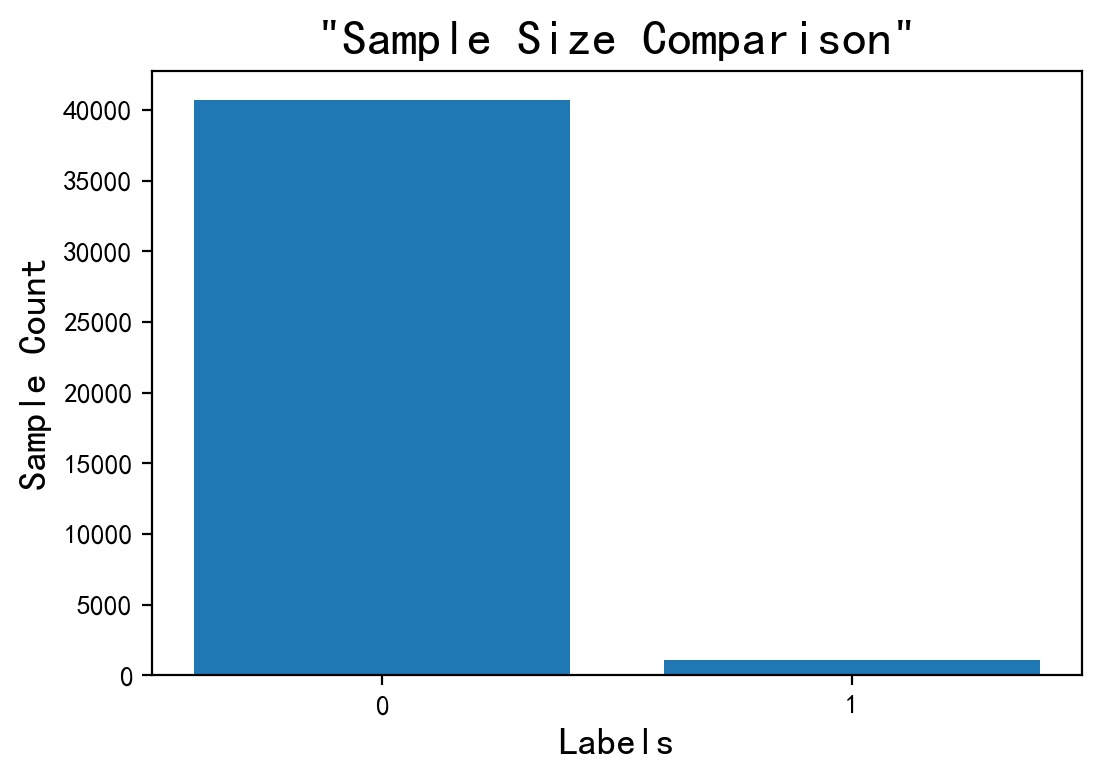

In [39]:
# Create a histogram to visualize the comparison of sample sizes.
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

labels = ['0', '1']
counts = data['target'].value_counts().values.tolist()

plt.figure(dpi = 200)
plt.bar(labels, counts)
plt.xlabel('Labels',fontsize = 14)
plt.ylabel('Sample Count',fontsize = 14)
plt.title('"Sample Size Comparison"',fontsize = 18)

plt.savefig("./pictures/pic1.png")
plt.show()


In [40]:
X = df
y = data['target']
counter = Counter(y)
print(X.shape, y.shape) 
print('Target class distribution: {}'.format({k: v for k, v in counter.items()})) 

(41808, 55) (41808,)
Target class distribution: {0: 40692, 1: 1116}


In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline 

In [42]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report

In [43]:
sample_solver = SMOTE(random_state=123)
X_, y_ = sample_solver.fit_resample(X, y)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_, y_, random_state=120,test_size=0.25)

In [55]:
# Model evaluation and visualisation functions 
def evaluate_model(y_true, y_pred, ind):
    accuracy = accuracy_score(y_true, y_pred)  
    precision = precision_score(y_true, y_pred)  
    recall = recall_score(y_true, y_pred) 
    f1 = f1_score(y_true, y_pred) 

    cm = confusion_matrix(y_true, y_pred)

 
    plt.figure(dpi = 200)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')  
    plt.colorbar()  
    classes = np.unique(y_true)  
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)  
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2. 
    for i in range(cm.shape[0]): 
        for j in range(cm.shape[1]): 
            plt.text(j, i, format(cm[i, j], 'd'), 
                     horizontalalignment="center", 
                     color="white" if cm[i, j] > thresh else "black") 
 
    plt.ylabel('True label("Actual Labels")')
    plt.xlabel('Predicted label（"Predicted Labels"）')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    print(f"\nClassified reports：\n   { classification_report(y_true, y_pred)}")
    plt.savefig(f"./pictures/pic{ind}.png")
    plt.show()
    return accuracy,precision,recall,f1

In [46]:
model_eval = dict()

Accuracy: 0.9844
Precision: 0.9889
Recall: 0.9795
F1 Score: 0.9842

Classified reports：
                 precision    recall  f1-score   support

           0       0.98      0.99      0.98     10247
           1       0.99      0.98      0.98     10099

    accuracy                           0.98     20346
   macro avg       0.98      0.98      0.98     20346
weighted avg       0.98      0.98      0.98     20346



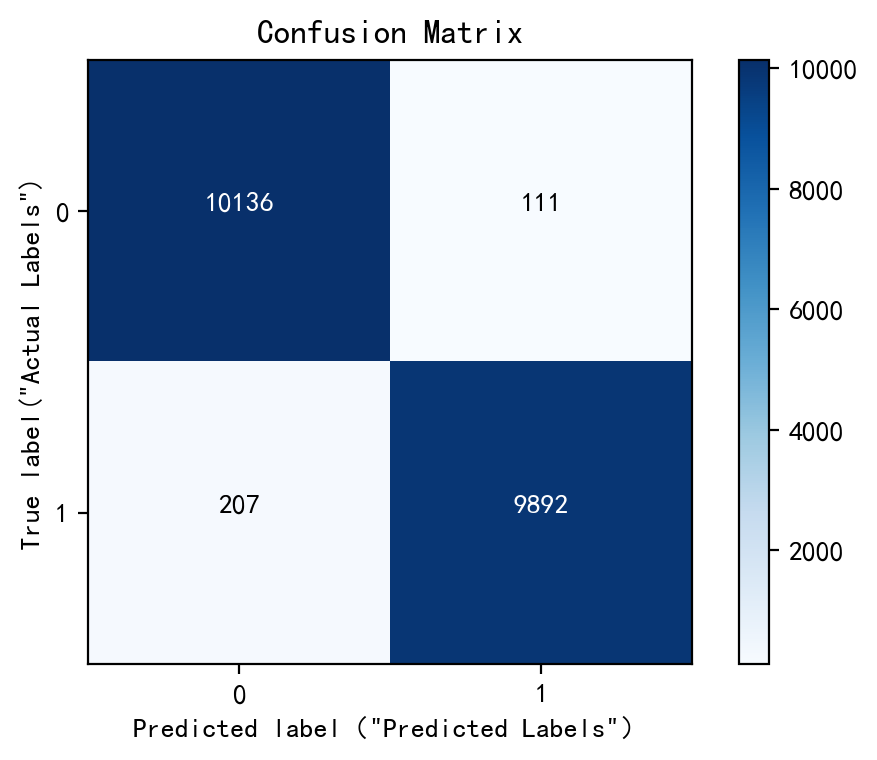

In [57]:
from xgboost import XGBClassifier 

xgboost_model = XGBClassifier()

xgboost_model.fit(x_train, y_train)

xgb_y_pred = xgboost_model.predict(x_test)

accuracy,precision,recall,f1 = evaluate_model(y_test, xgb_y_pred, 2)
model_eval["xgb_v1"] = [accuracy,precision,recall,f1]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


xgb_model = xgb.XGBClassifier()


xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5,n_jobs=-1)
xgb_grid_search.fit(x_train, y_train)  

Model Accuracy:  0.9860414823552541
Accuracy: 0.9860
Precision: 0.9925
Recall: 0.9793
F1 Score: 0.9858

Classified reports：
                 precision    recall  f1-score   support

           0       0.98      0.99      0.99     10247
           1       0.99      0.98      0.99     10099

    accuracy                           0.99     20346
   macro avg       0.99      0.99      0.99     20346
weighted avg       0.99      0.99      0.99     20346



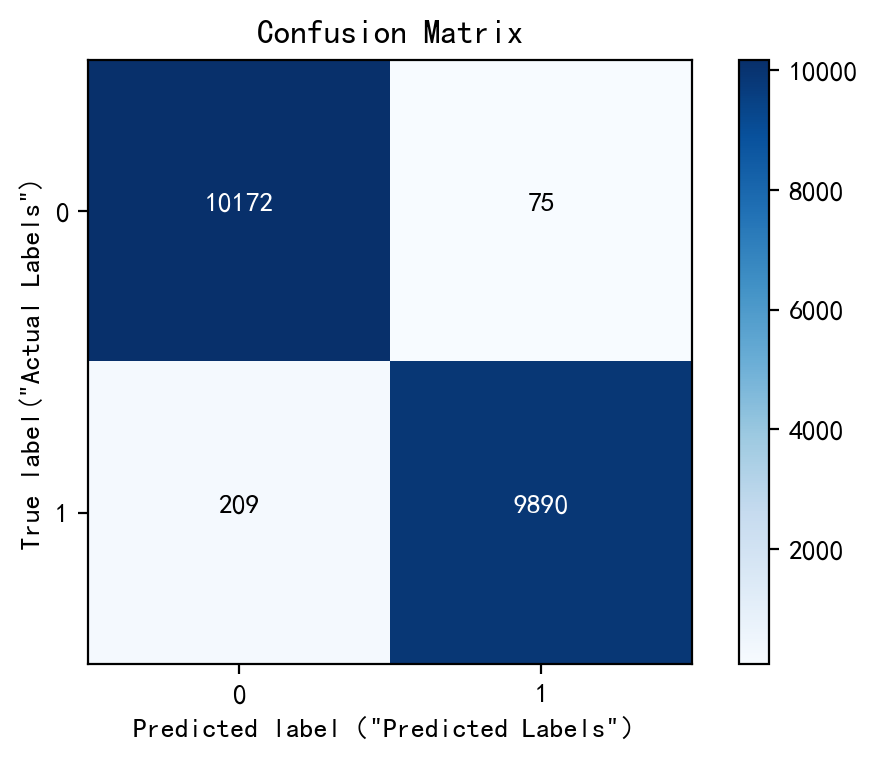

In [58]:
import xgboost as xgb

xgb_best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}

best_xgb_model = xgb.XGBClassifier(**xgb_best_params)
best_xgb_model.fit(x_train, y_train)

accuracy = best_xgb_model.score(x_test, y_test)  
print("Model Accuracy: ", accuracy)

xgb_y_pred1 = best_xgb_model.predict(x_test)


accuracy,precision,recall,f1 = evaluate_model(y_test, xgb_y_pred1,3)
model_eval["xgb_v2"] = [accuracy,precision,recall,f1] 

Accuracy: 0.7524
Precision: 0.7199
Recall: 0.8205
F1 Score: 0.7669

Classified reports：
                 precision    recall  f1-score   support

           0       0.79      0.69      0.74     10247
           1       0.72      0.82      0.77     10099

    accuracy                           0.75     20346
   macro avg       0.76      0.75      0.75     20346
weighted avg       0.76      0.75      0.75     20346



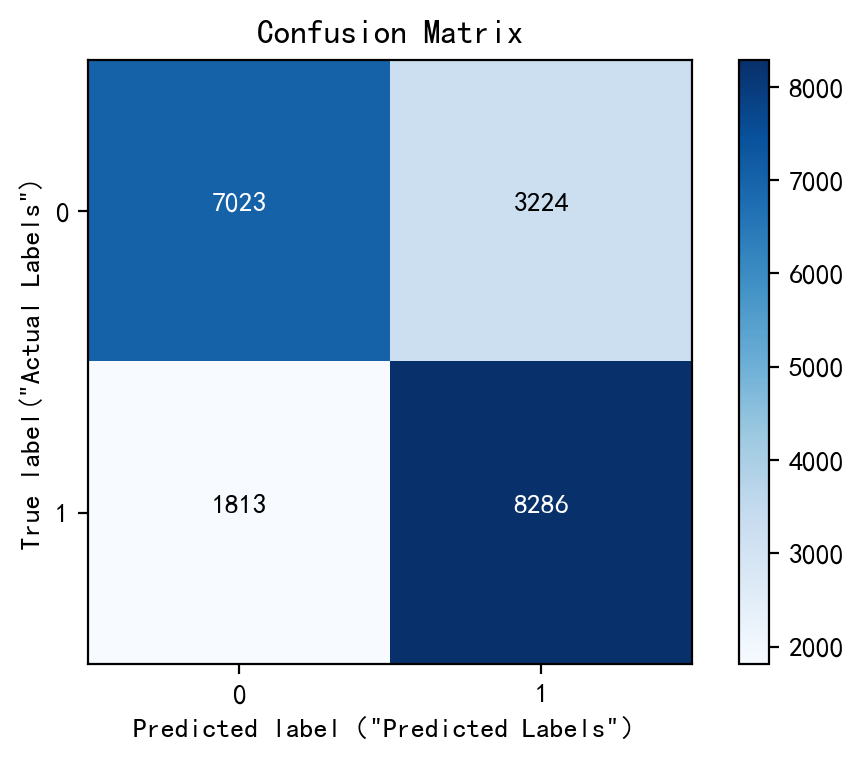

In [59]:
from sklearn.naive_bayes import GaussianNB


naive_bayes_model = GaussianNB()


naive_bayes_model.fit(x_train, y_train)


y_pred = naive_bayes_model.predict(x_test)


accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred,4)
model_eval["gnb_v1"] = [accuracy, precision, recall, f1]  

Best Parameters: {'var_smoothing': 1e-09, 'priors': [0.8, 0.2]}
Accuracy: 0.7623
Precision: 0.7988
Recall: 0.6964
F1 Score: 0.7441

Classified reports：
                 precision    recall  f1-score   support

           0       0.73      0.83      0.78     10247
           1       0.80      0.70      0.74     10099

    accuracy                           0.76     20346
   macro avg       0.77      0.76      0.76     20346
weighted avg       0.77      0.76      0.76     20346



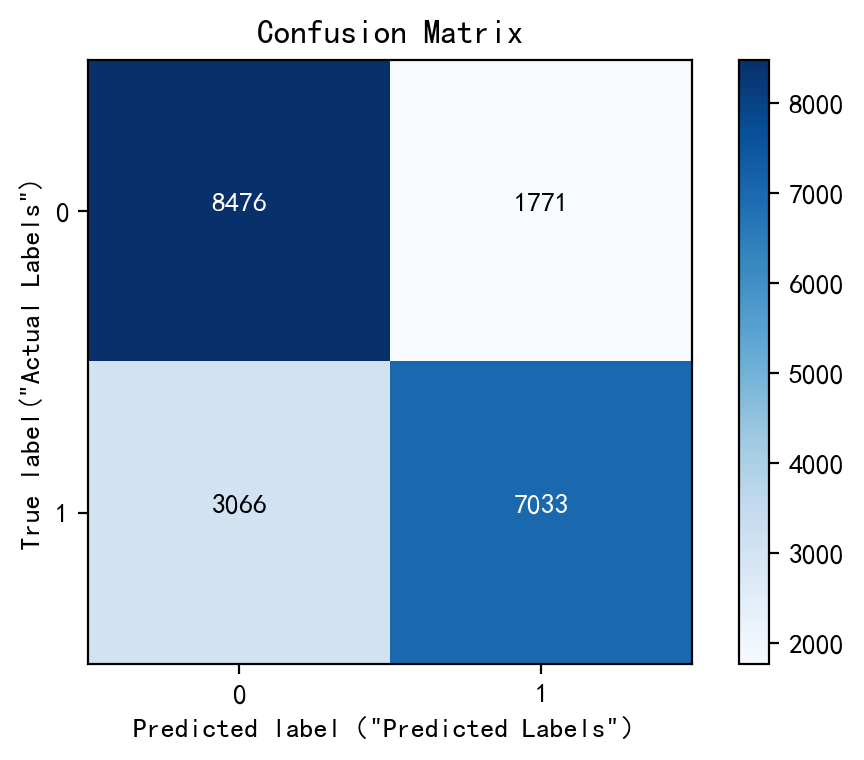

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [[0.2, 0.8], [0.5, 0.5], [0.8, 0.2]],
}


naive_bayes_model = GaussianNB()

random_search = RandomizedSearchCV(naive_bayes_model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

gnb_best_params = random_search.best_params_
print("Best Parameters:", gnb_best_params)

best_naive_bayes_model = GaussianNB(**gnb_best_params)

best_naive_bayes_model.fit(x_train, y_train)

y_pred = best_naive_bayes_model.predict(x_test)

accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred, 5)
model_eval["gnb_v2"] = [accuracy, precision, recall, f1]  

Accuracy: 0.9606
Precision: 0.9472
Recall: 0.9749
F1 Score: 0.9609

Classified reports：
                 precision    recall  f1-score   support

           0       0.97      0.95      0.96     10247
           1       0.95      0.97      0.96     10099

    accuracy                           0.96     20346
   macro avg       0.96      0.96      0.96     20346
weighted avg       0.96      0.96      0.96     20346



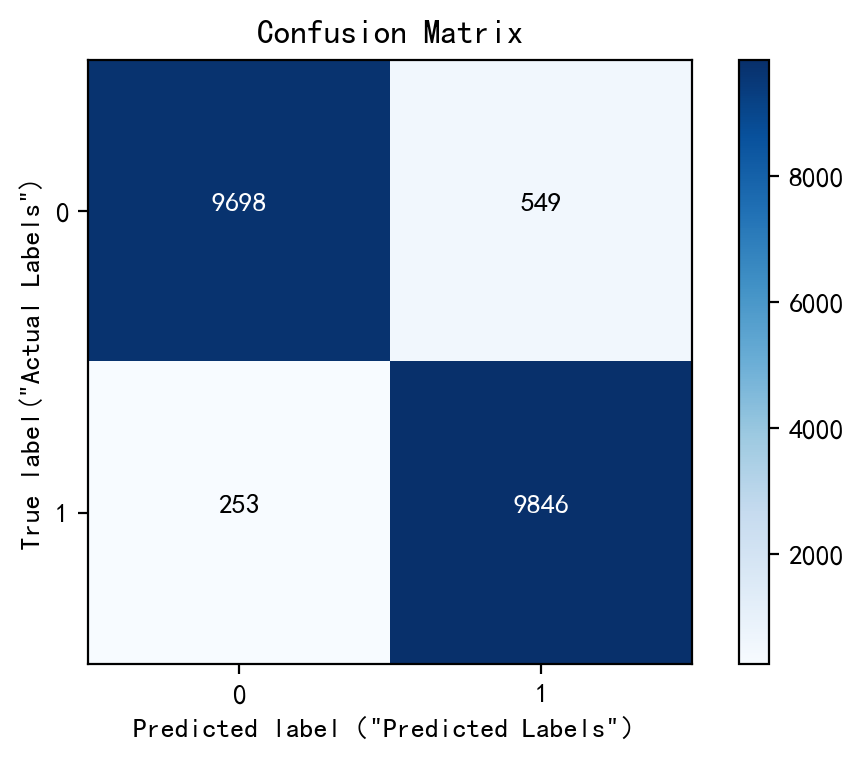

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(x_train, y_train)

dt_y_pred = dt_model.predict(x_test)

accuracy,precision,recall,f1 = evaluate_model(y_test, dt_y_pred,6)
model_eval["dt_v1"] = [accuracy,precision,recall,f1] 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 6, 9, None],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': np.arange(1, X.shape[1]+1)
}

dt_model = DecisionTreeClassifier(random_state=42)

dt_random_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, scoring='accuracy', cv=5, random_state=42,n_jobs=-1)
dt_random_search.fit(x_train, y_train) 

dt_random_search.best_params_

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9, None],
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

Model Accuracy:  0.9572889019954782
Accuracy: 0.9573
Precision: 0.9557
Recall: 0.9584
F1 Score: 0.9570

Classified reports：
                 precision    recall  f1-score   support

           0       0.96      0.96      0.96     10247
           1       0.96      0.96      0.96     10099

    accuracy                           0.96     20346
   macro avg       0.96      0.96      0.96     20346
weighted avg       0.96      0.96      0.96     20346



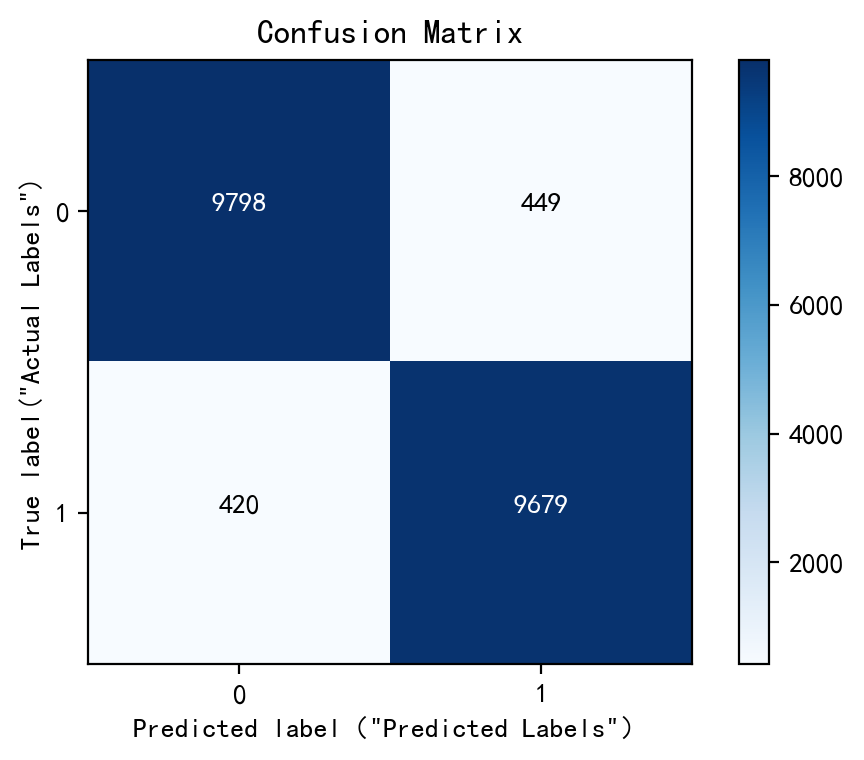

In [62]:
# dt_best_params = dt_random_search.best_params_
# print("Best Parameters: ", dt_best_params)

dt_best_params = {'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 42, 'max_depth': None, 'criterion': 'entropy'}


best_dt_model = DecisionTreeClassifier(**dt_best_params)
best_dt_model.fit(x_train, y_train)


accuracy = best_dt_model.score(x_test, y_test) 
print("Model Accuracy: ", accuracy)


best_dt_y_pred = best_dt_model.predict(x_test)


accuracy,precision,recall,f1 = evaluate_model(y_test, best_dt_y_pred,7)
model_eval["dt_v2"] = [accuracy,precision,recall,f1]

In [63]:
model_eval

{'xgb_v1': [0.9843703922146859,
  0.9889033290012996,
  0.9795029210812952,
  0.9841806785394488],
 'xgb_v2': [0.9860414823552541,
  0.9924736578023081,
  0.9793048816714526,
  0.9858452950558213],
 'gnb_v1': [0.7524329106458272,
  0.7198957428323197,
  0.8204772749777206,
  0.7669026794391226],
 'gnb_v2': [0.7622628526491694,
  0.7988414357110404,
  0.6964055847113576,
  0.7441146907898216],
 'dt_v1': [0.9605819325665979,
  0.9471861471861471,
  0.9749480146549163,
  0.9608665951010051],
 'dt_v2': [0.9572889019954782,
  0.9556674565560821,
  0.9584117239330627,
  0.9570376229791862]}

可视化部分

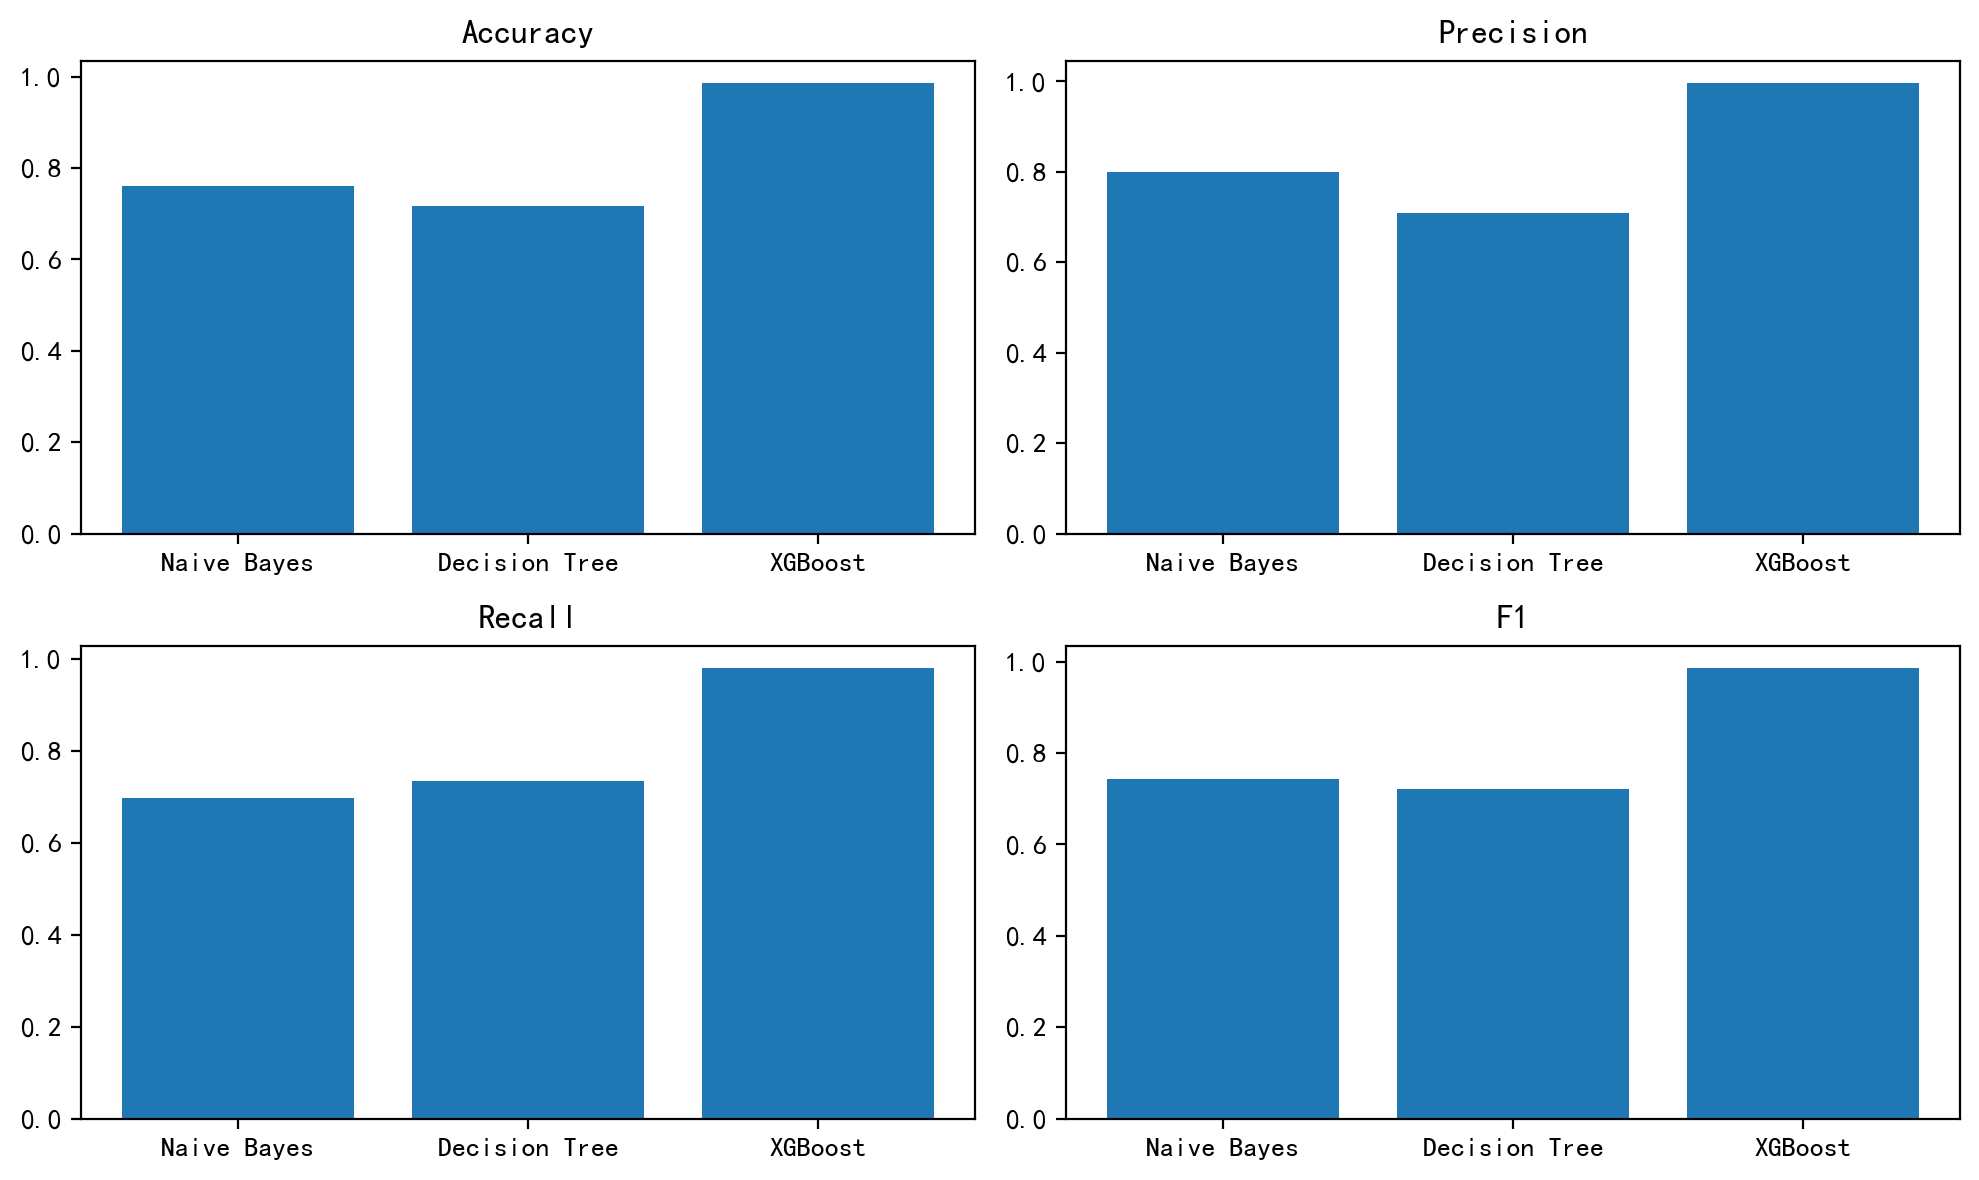

In [64]:
# Visualization Section Code Showcase
import numpy as np
import matplotlib.pyplot as plt


models = ['Naive Bayes', 'Decision Tree', 'XGBoost']

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

accuracy = [0.762, 0.718, 0.986]
precision = [0.799, 0.708, 0.996]
recall = [0.696, 0.734, 0.979]
f1 = [0.744, 0.721, 0.986]

plt.figure(figsize=(10, 6),dpi = 200)

plt.subplot(2, 2, 1)
plt.bar(models, accuracy)
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precision)
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recall)
plt.title('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1)
plt.title('F1')

plt.tight_layout()

plt.savefig("./pictures/pic8.png")
plt.show()


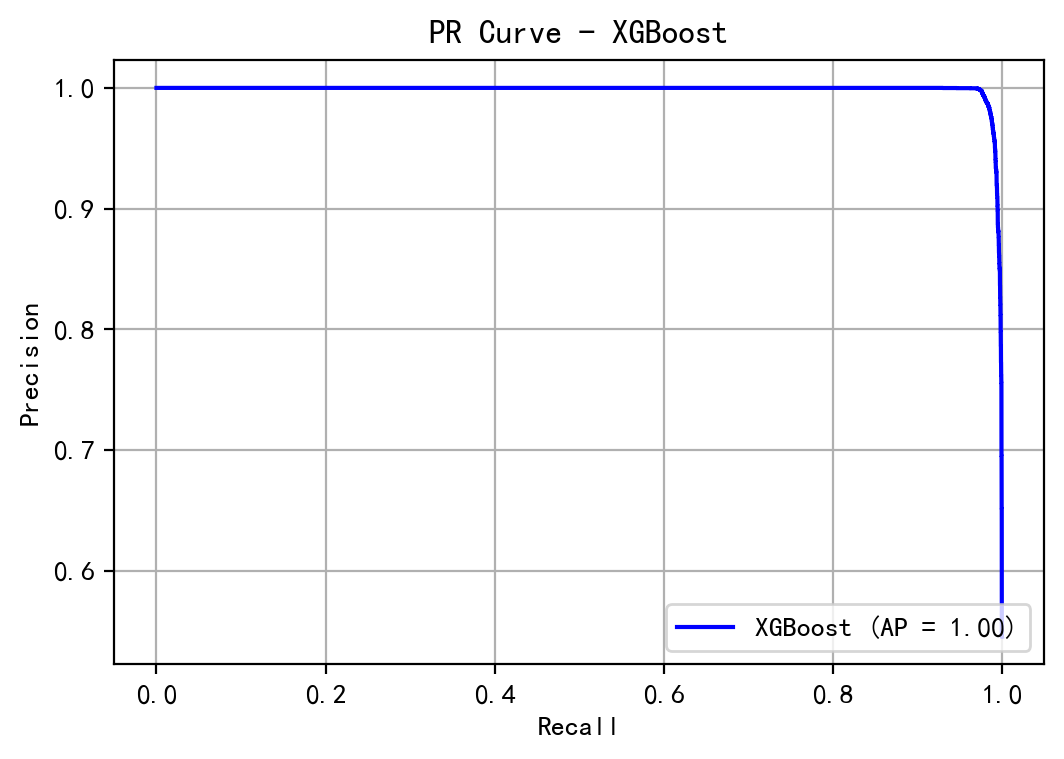

In [65]:
#PR curve plot for the XGBoost algorithm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_scores = best_xgb_model.predict_proba(x_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

average_precision = average_precision_score(y_test, y_scores)

plt.figure(dpi = 200)
plt.plot(recall, precision, color='b', label=f'XGBoost (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("./pictures/pic9.png")
plt.show()


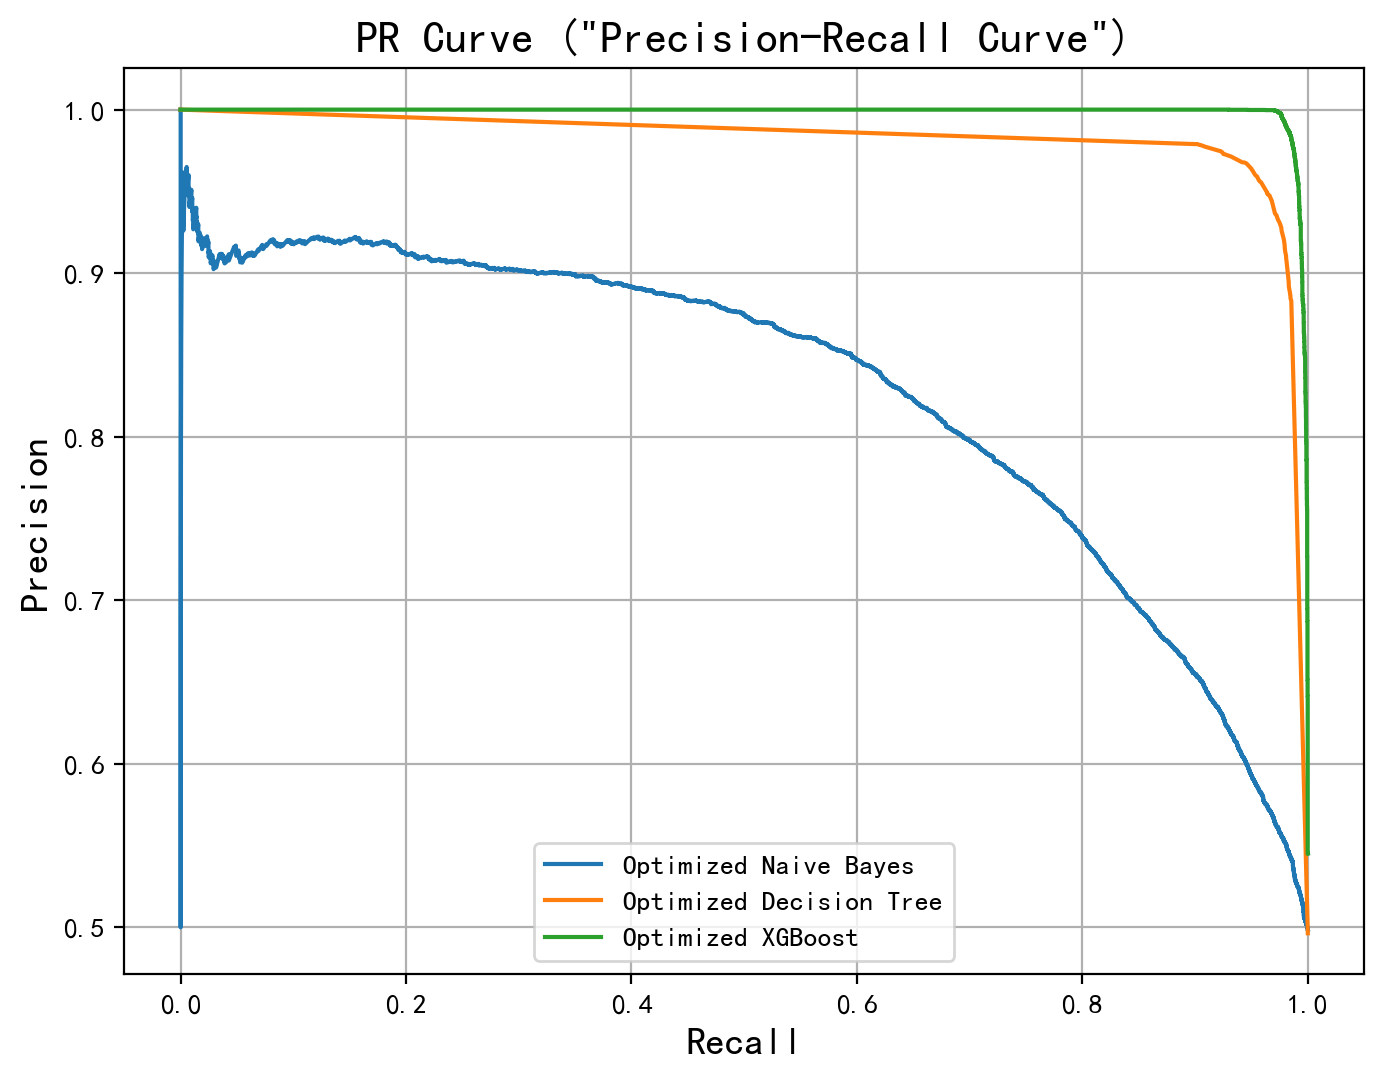

In [66]:
# PR Curve Comparison for Three Algorithms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

y_scores_nb = best_naive_bayes_model.predict_proba(x_test)[:, 1]
y_scores_dt = best_dt_model.predict_proba(x_test)[:, 1]
y_scores_xgbost = best_xgb_model.predict_proba(x_test)[:, 1]

precision_alg1, recall_alg1, thresholds_alg1 = precision_recall_curve(y_test, y_scores_nb)
precision_alg2, recall_alg2, thresholds_alg2 = precision_recall_curve(y_test, y_scores_dt)
precision_alg3, recall_alg3, thresholds_alg3 = precision_recall_curve(y_test, y_scores_xgbost)

plt.figure(figsize=(8, 6),dpi=200)
plt.plot(recall_alg1, precision_alg1, label='Optimized Naive Bayes')
plt.plot(recall_alg2, precision_alg2, label='Optimized Decision Tree')
plt.plot(recall_alg3, precision_alg3, label='Optimized XGBoost')

plt.xlabel('Recall',fontsize = 14)
plt.ylabel('Precision',fontsize = 14)
plt.title('PR Curve ("Precision-Recall Curve")',fontsize = 16)
plt.legend()
plt.grid(True)
plt.savefig("./pictures/pic10.png")
plt.show()


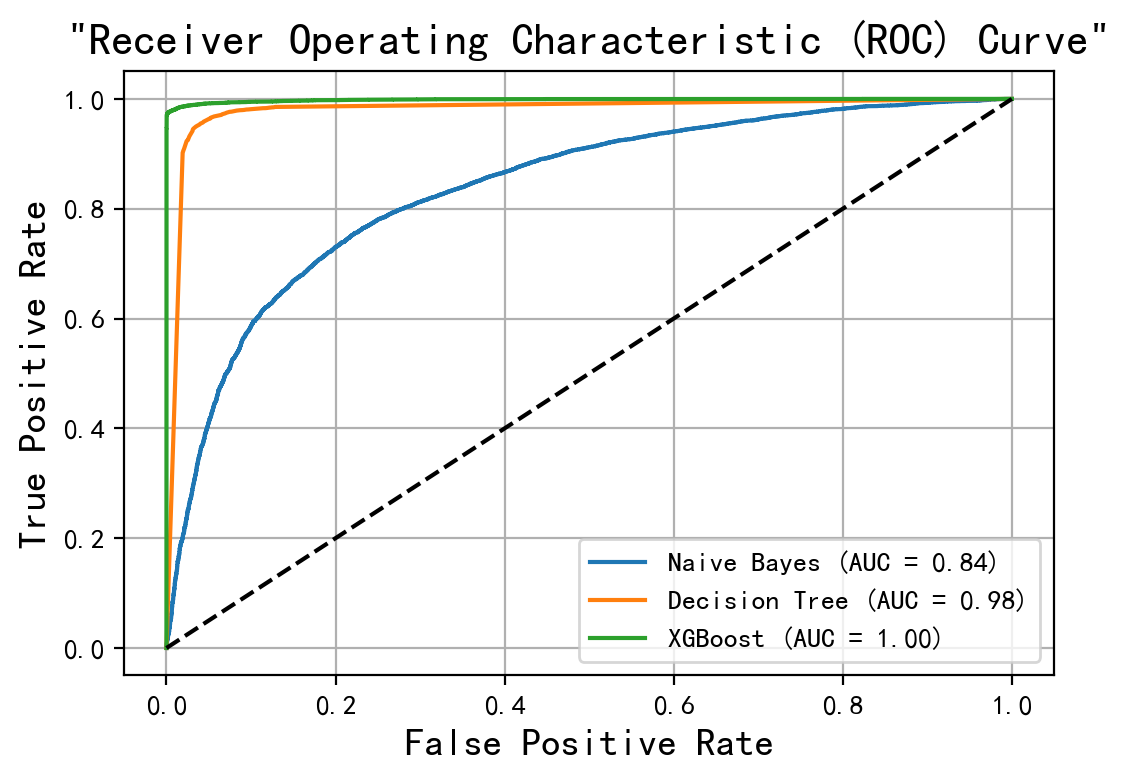

In [67]:
#Compute the ROC curves for three algorithms and plot the ROC curve graph
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, y_scores_nb)
nb_auc = auc(nb_fpr, nb_tpr)

dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, y_scores_dt)
dt_auc = auc(dt_fpr, dt_tpr)

xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, y_scores_xgbost)
xgb_auc = auc(xgb_fpr, xgb_tpr)

plt.figure(dpi = 200)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = %.2f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %.2f)' % dt_auc)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = %.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate',fontsize = 14)
plt.ylabel('True Positive Rate',fontsize = 14)
plt.title('"Receiver Operating Characteristic (ROC) Curve"',fontsize = 16)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("./pictures/pic11.png")
plt.show()
